# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

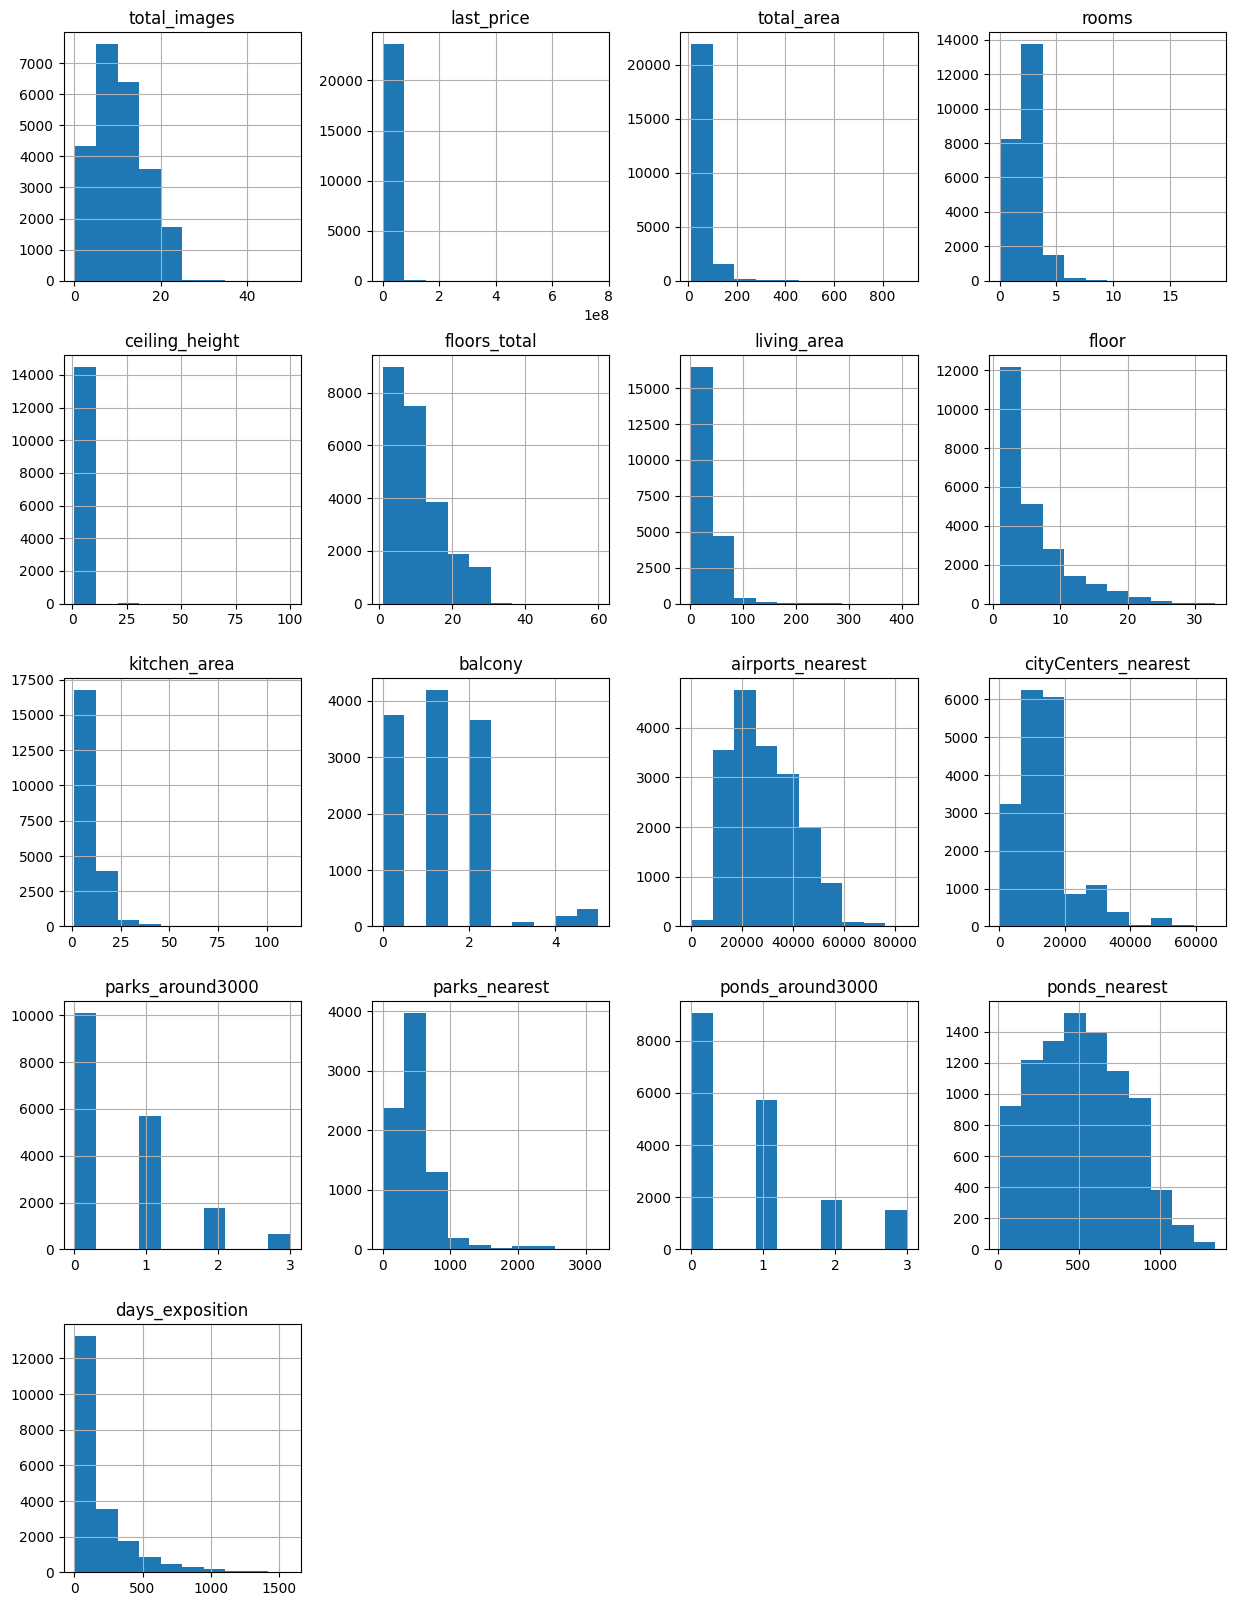

In [3]:
data.hist(figsize=(15, 20))
plt.show()


<b>Предварительная визуализация не дает необходимое отображение для анализа. В дальнейшем каждый столбец будет рассмотрен отдельно. В глаза бросается большое количество нулевых значений в столбцах rooms, floor_total, parks_around3000 и ponds_around3000. 
Данные в столбце представлены в неудобном виде, столбец is_apartment имеет тип object вместо bool. Данным необходима тщательная предобработка.



### Выполните предобработку данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим достаточное количество пропусков в данных. 

**ceiling_height:**


Причины пропусков:


Человеческий фактор. Многие могли не знать высоту потолков или просто не заполнить поле.


Заполнение:


Высоту потолков трудно предугадать по остальным данным, заменим пропуски медианным значением по городу. Если бы в базе была информация о годе постройки дома, можно было бы с хорошей точностью угадать высоту потолков.


**floors_total:**


Причины пропусков:


Пропуски составляют менее 1%. Можно считать, что часть данных могла потеряться при загрузке в базу данных.


Заполнение:


Заполним их медианой и не будем переживать.


**living_area:**


Причины пропусков:


Жилую площадь нужно расчитывать исходя из количества нежилых помещений. Думаю, причина пропусков - человеческий фактор.


Заполнение:


Жилая площадь прямопропорциональна количеству комнат в квартире, поэтому заполним медианой с учетом количества комнат.


**is_apartment:**


Причины пропусков:


Очень неоднозначный столбец, почти 90% пропусков. 

Обыватели скорее всего не знают разницы между квартирой и апартаментами. Предположим, что все обладатели апартаментов знают об этом и указывают это в данных. Однако, рынок апартаментов с каждым годом растет, пропуски в этом столбце в дальнейшем необходимо устранять более правильно. 
Также пропуски могли появиться из-за того, что данное поле было добавлено недавно.


Заполнение:


Заполним пропуски значением False.


**kitchen_area:**


Аналогично floors_total.


**balcony:**

Причина пропусков:


Почти половина данных пропущена. Пользователи скорее всего не заполняли поле, если в квартире нет балкона.


Заполнение:


Будем считать, что пропуск эквивалентен отсутствию балкона.


**locality_name:**


Пропуски несущественны. Заменим на "Другое"



In [5]:
#Сначала заполним столбцы, полученные от клиентов
#Заполняем ceiling_height
for city in data['locality_name'].unique():
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == city), 'ceiling_height'] = data.loc[data['locality_name'] == city, 'ceiling_height'].median()
#после цикла осталось 35 пропусков, заполним их медианой по всему столбцу
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#заполняем floors_total
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'] = data['floors_total'].astype(int) # количество этажей точно целое 

#заполняем living_area
for rooms in data['rooms'].unique():
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area'] = data.loc[data['rooms'] == rooms, 'living_area'].median()

#заполняем is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

#заполняем kitchen_area
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

#заполняем balcony
data['balcony'] = data['balcony'].fillna(0)

#заполняем locality_name и избавляемся от неявных дубликатов
data['locality_name'] = data['locality_name'].fillna("Другое")
data['locality_name'] = data['locality_name'].replace(['поселок', 'посёлок', 'поселок городского типа', 'городской поселок', 'коттеджный поселок'],'поселок', regex = True )


/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/numpy/lib/nanfunction

/var/folders/lf/dcg54srj5d51vz1gyqf6dt100000gn/T/ipykernel_2210/3136660189.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполнили все пропуски в столбцах, заполненных пользователями. Данные, полученные по картографических источников содержат большое количество синхронизированных пропусков. Около 5000 строк содержат Nan во всех картографических столбцах. Столбцы parks_nearest и ponds_nearest содержат по 15 000 пропусков. Проблема лежит в алгоритмах заполнения этих столбцов: 
1. Возможна ошибка в написании названия населенного пункта. В данных встречаются различные названия одного и того же населенного пункта. Алгоритм не нашел населенный пункт с таким названием и не заполнил строки.
2. Зона поиска задана неверно. В пропусках есть поселки, находящиеся в прямой близости с аэропортом, но содержащие пропуск в соотвествующих полях.
3. Для заполнения полей с парками и прудами необходима информация о прудах в картах, возможно, в зоне поиска были найдены водоемы, не указанные в картах как пруды


Эти данные можно заполнить, используя координаты населенных пунктов и аэропортов из онлайн карт, однако, это будет уже совершенно другой проект

### Добавьте в таблицу новые столбцы

In [7]:
#цена одного квадратного метра
data['meter_price'] = round(data['last_price']/data['total_area'], 2)

#данные о публикации
data['day'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S').dt.weekday
data['month'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S').dt.month
data['year'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S').dt.year

#данные об категории этажа
data.loc[data['floor'] == 1, 'floor_type']  = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type']  = 'последний'
data.loc[(data['floor_type'] != 'первый')&(data['floor_type'] != 'последний'), 'floor_type'] = 'другой'

#расстояние до центра города в километрах
data['distance_to_center'] = round(data['cityCenters_nearest']/1000)


### Проведите исследовательский анализ данных

#### Рассмотрим каждый параметр отдельно

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

25 < total_area < 40 rooms
1    5270
2     112
0     110
Name: count, dtype: int64
40 < total_area < 50 rooms
2    2759
1    1939
3     124
4      67
0       4
Name: count, dtype: int64
50 < total_area < 70 rooms
2    3854
3    2321
1     321
4      61
5       6
0       1
Name: count, dtype: int64


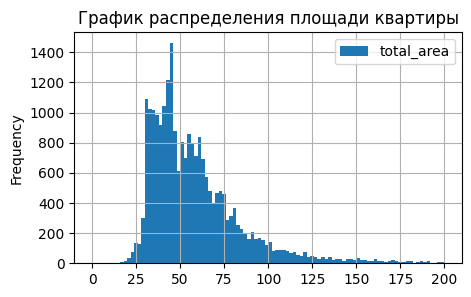

In [8]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, 
          figsize = (5,3), range = (0,200), title = 'График распределения площади квартиры')

print(data['total_area'].describe())
print()
print('25 < total_area < 40', data.query('25 < total_area < 40')['rooms'].value_counts())
print('40 < total_area < 50', data.query('40 < total_area < 50')['rooms'].value_counts())
print('50 < total_area < 70', data.query('50 < total_area < 70')['rooms'].value_counts())


Средняя площадь квартиры составляет 60 кв.м., а медиана 52 кв.м. 


Визуально распределение похоже на нормальное с коротким левым хвостом. Слева видим три размытых пика, соотвествующих 1,2 и 3 комнатным квартирам.

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64
10 < living_area < 20 rooms
1    6627
0     148
2      67
3       5
Name: count, dtype: int64
25 < living_area < 40 rooms
2    6950
3    1002
1     187
4      79
0       6
5       3
Name: count, dtype: int64


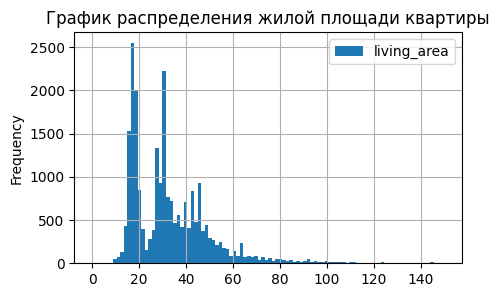

In [9]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,150), title = 'График распределения жилой площади квартиры')
print(data['living_area'].describe())
print('10 < living_area < 20', data.query('10 < living_area < 20')['rooms'].value_counts())
print('25 < living_area < 40', data.query('25 < living_area < 40')['rooms'].value_counts())

Видим на гистограмме что-то отдаленно-нормальное с яркими пиками в районе 19 кв.м. и 30 кв.м. Распределение можно назвать бимодальным, поэтому описательные статистики не совсем показательны.


Пики соотвествуют однокомнатным и двухкомнатным квартирам.

kitchen_area < 5: 105
kitchen_area
9.1     2360
6.0     1300
10.0    1262
8.0     1110
9.0     1101
7.0     1062
11.0     797
12.0     662
8.5      415
5.5      400
Name: count, dtype: int64


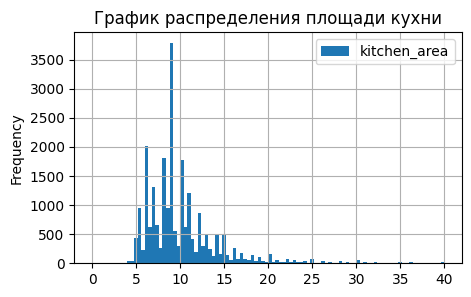

In [10]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,40), title = 'График распределения площади кухни')
data['kitchen_area'].describe()
print('kitchen_area < 5:', data.query('kitchen_area < 5')['kitchen_area'].count())
print(data['kitchen_area'].value_counts().head(10))

По своду правил по проектированию и строительству площадь кухни не должна быть менее 5 кв.м. Квартир с площадью менее 5 кв.м. всего 105. Они не сильно повлияют на данные, можем их не трогать. Видим яркие пики по некотрым площадям. Наиболее часто встречаются кухни с площадью от 6 до 10 кв.м.

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: price, dtype: float64
Квартир от 3 до 7 млн: 13986


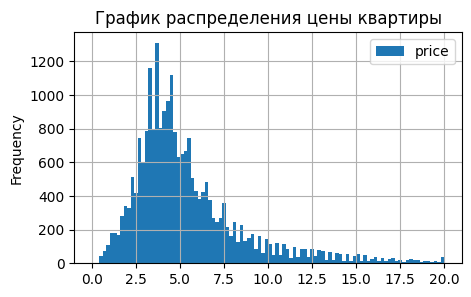

In [11]:
data['price'] = data['last_price']/1000000
data.plot(y = 'price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,20), title = 'График распределения цены квартиры')
print(data['price'].describe())
print('Квартир от 3 до 7 млн:', data.query('3 < price < 7')['price'].count())


Видим четкое нормальное распределение. Средняя стоимость квартиры 6,5 млн. руб. Большая часть квартир находится в диапазоне от 3 до 7 млн.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Квартир с 0 команатами: 197
Из них студий: 138


rooms
1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: count, dtype: int64

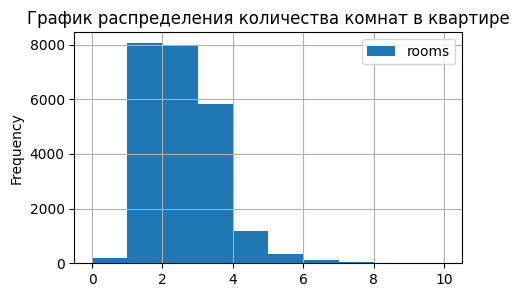

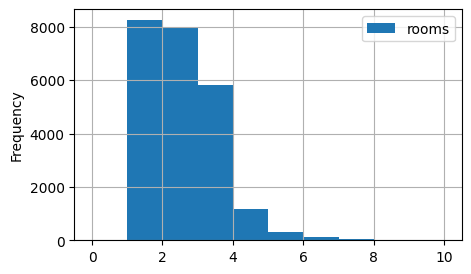

In [12]:
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0,10), title = 'График распределения количества комнат в квартире')
print(data['rooms'].describe())
print()
print('Квартир с 0 команатами:',data.query('rooms == 0')['rooms'].count())
print('Из них студий:',data.query('rooms == 0')['studio'].sum())


data.loc[data['rooms'] == 0, 'rooms'] = 1
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0,10))
data['rooms'].describe()
data['rooms'].value_counts()




Видим, что существуют квартиры из 0 комнат. Это явно аномальные значения, причем большая часть из них студии. Исправим аномальные значения и получим четкий ступенчатый график. Чаще всего встречаются 1 и 2 комнатные квартиры.

До обработки аномалий
 count    23699.000000
mean         2.733877
std          1.009388
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

После обработки аномалий
 count    23699.000000
mean         2.707214
std          0.286062
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64


ceiling_height
2.70    7983
2.50    4167
2.60    2137
2.55    1572
2.75    1122
Name: count, dtype: int64

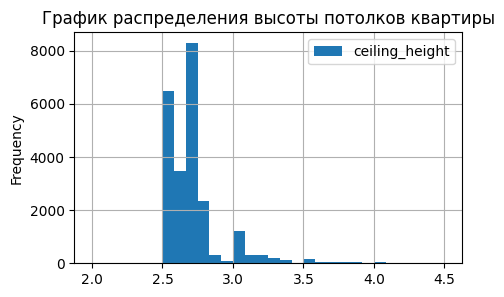

In [13]:
print('До обработки аномалий\n', data['ceiling_height'].describe())
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height']/10
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (2,4.5), title = 'График распределения высоты потолков квартиры')
print('\nПосле обработки аномалий\n', data['ceiling_height'].describe())
data['ceiling_height'].value_counts().head()

В данных о высоте потолков наблюдались аномальные значения, что видно по таблице с описательной статистикой. Максимальная высота потолков 100 метров? Больше чем Пантеон в Греции. В высоту потолков 14-15 метров еще можно поверить, вдруг продается какой-то дворец. Все данные больше 20 метров считаем ошибочными и делим на 10. Больше всего квартир имеют высоту потолков 2.7 и 2.5 метров.

floors_total
5     5792
9     3766
16    1376
12    1368
4     1210
Name: count, dtype: int64

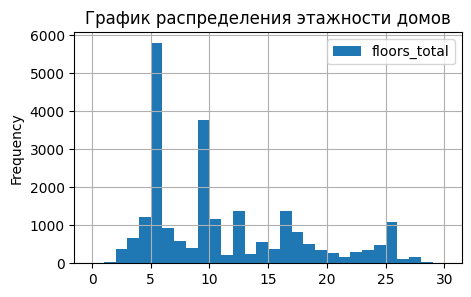

In [14]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,30), title = 'График распределения этажности домов')
data['floors_total'].describe()
data['floors_total'].value_counts().head()

Распределение этажности похоже на равномерное с двумя характерными пиками на 5 и 9 этажах. С 1950 по 1980 такие строительство таких зданий было в приоритете. По гостам пятиэтажкам  не нужен лифт, а девятиэтажкам не нужна сложная система пожарной безопасности. 


distance_to_center
12.0    1607
15.0    1568
13.0    1457
14.0    1279
16.0    1265
Name: count, dtype: int64
distance_to_center > 14
 locality_name
Санкт-Петербург      4707
поселок Шушары        436
Пушкин                368
Колпино               337
поселок Парголово     327
Name: count, dtype: int64


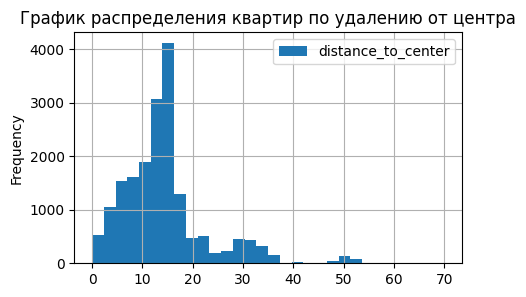

In [15]:
data.plot(y = 'distance_to_center', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,70), title = 'График распределения квартир по удалению от центра')
print()
print(data['distance_to_center'].value_counts().head())
print('distance_to_center > 14\n', data.query('distance_to_center > 14')['locality_name'].value_counts().head())

Половина всех продаваемых квартир находится в пределах 13 километров от центра, что соотвествует размеру Петербурга. Наибольшее количество квартир расположено в 12-16 км от центра города.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Квартир в пределах километра от парка: 7702


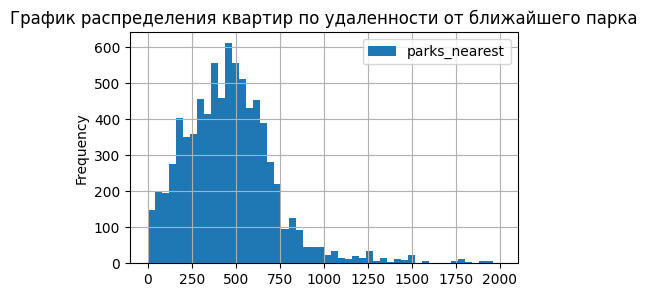

In [16]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,2000), title = 'График распределения квартир по удаленности от ближайшего парка')
print(data['parks_nearest'].describe())
print()
print('Квартир в пределах километра от парка:', data.query('parks_nearest <= 1000')['parks_nearest'].count())

В Петербурге довольно много парков. 7700 квартир находятся в пределах километра от парка(из 8079, по которым есть данные). В среднем от квартиры до ближайшего парка около 500 метров.

In [17]:
pd.pivot_table(data, index = 'floor_type', aggfunc = 'count')
data['floor_type'].value_counts()

floor_type
другой       17363
последний     3447
первый        2889
Name: count, dtype: int64

Больше 70% квартир расположены не на первом или последнем этаже.

#### Начнем анализ продаж квартир!

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

days_exposition
45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: count, dtype: int64
days_exposition
45.0    880
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
20.0    139
8.0     139
44.0    138
Name: count, dtype: int64


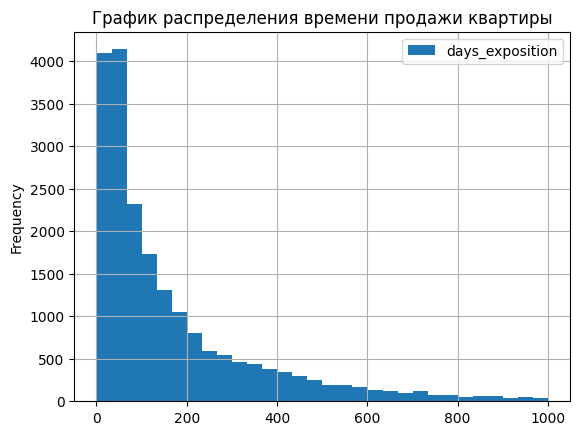

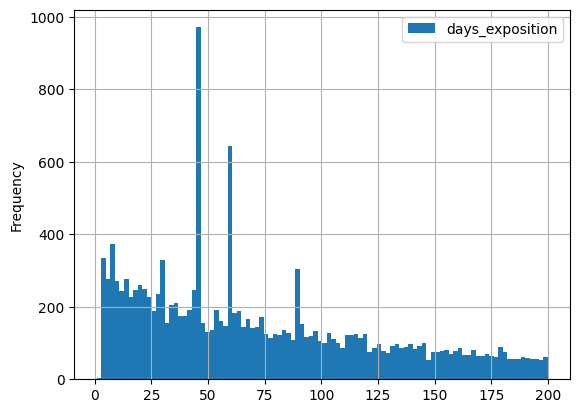

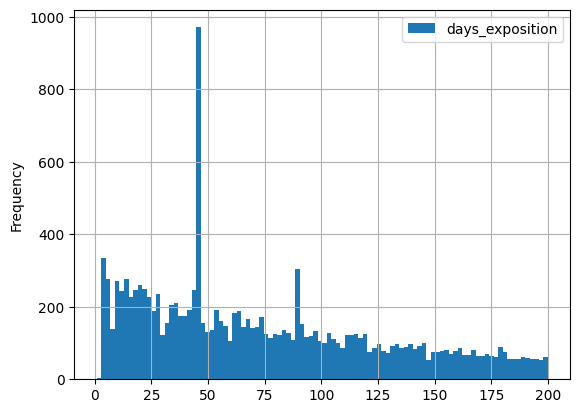

In [18]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1000), title = 'График распределения времени продажи квартиры')
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
print(data['days_exposition'].describe())
print()
print(data['days_exposition'].value_counts().head(10))

data['days_exposition'].fillna(0)
good_data = data.loc[~(data['days_exposition'].isin([0,7,30,45,60,90]))]

good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
print(good_data['days_exposition'].value_counts().head(10))



Проанализируем скорость продажи квартир. Видим распределение Пуассона. 
Большая часть квартир продается в течение 200 дней после публикации. Медиана 95 дней, а среднее 180 дней. Быстрой продажей можно считать срок меньше 180 дней. 

При приближенном рассмотрении данного диапазона видим аномальные пики.
Аномальные значения: 7, 30, 45, 60, 90 дней после публикации. Что-то тут не так, очень четкие временные диапазоны. 
На авито максимальный срок публикации равен 30 дней. После этого срока необходимо вручную подтвердить обновление публикации. Возможно, такие сроки публикации можно выбрать в исследуемом сервисе. 
Считаю, что такие значение нужно исключить из анализа. **Но!** Я испробовал разные способы фильрации этих данных, но у меня все равно остаются 45 и 90 дней. Проверял good_data через query на наличие 45 и 90 в столбце и получал пустой df. Тут точно что-то не так с данными, но пока не понял что

Корреляция по пирсону между общей площадью и ценой квадратного метра: 0.3019602103271342


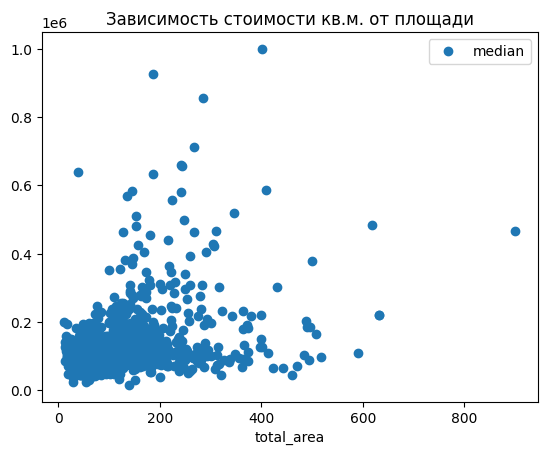

In [19]:
print('Корреляция по пирсону между общей площадью и ценой квадратного метра:',data['total_area'].corr(data['meter_price']))
pivot_sq_meter = data.pivot_table(index = 'total_area', values = 'meter_price', aggfunc = ['median', 'mean', 'count'] )
pivot_sq_meter.columns = ['median', 'mean', 'count']
pivot_sq_meter.plot(y = 'median', style = 'o', title = 'Зависимость стоимости кв.м. от площади')
plt.show()

Видим небольшую корреляцию: при увеличении площади квартиры немного растет и цена за квадратный метр. 

Корреляция по пирсону между жилой площадью и ценой квадратного метра: 0.21218122857604793


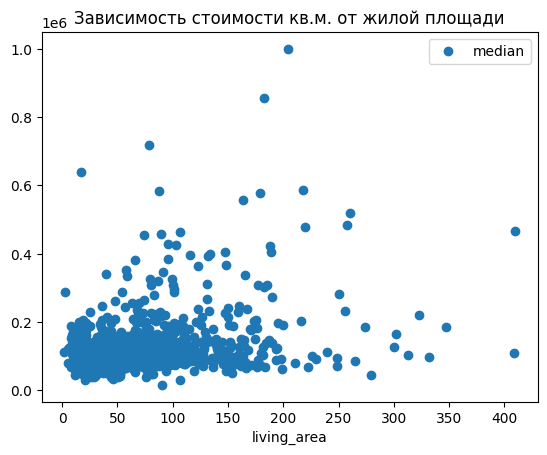

In [20]:
print('Корреляция по пирсону между жилой площадью и ценой квадратного метра:',data['living_area'].corr(data['meter_price']))
pivot_live_sq_meter = data.pivot_table(index = 'living_area', values = 'meter_price', aggfunc = ['median', 'mean', 'count'] )
pivot_live_sq_meter.columns = ['median', 'mean', 'count']
pivot_live_sq_meter.plot(y = 'median', style = 'o', title = 'Зависимость стоимости кв.м. от жилой площади')
plt.show()

Результат аналогичен площади квартиры.

Корреляция по пирсону между площадью кухни и ценой квадратного метра: 0.36080666114548543


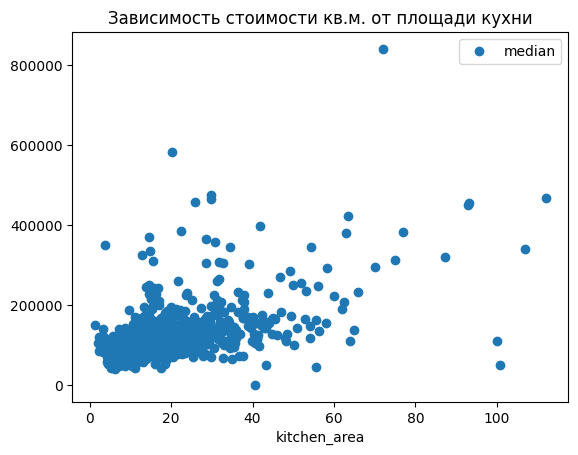

In [21]:
print('Корреляция по пирсону между площадью кухни и ценой квадратного метра:',data['kitchen_area'].corr(data['meter_price']))
pivot_kitchen_sq_meter = data.pivot_table(index = 'kitchen_area', values = 'meter_price', aggfunc = ['median', 'mean', 'count'] )
pivot_kitchen_sq_meter.columns = ['median', 'mean', 'count']
pivot_kitchen_sq_meter.plot(y = 'median', style = 'o', title = 'Зависимость стоимости кв.м. от площади кухни')
plt.show()

Наблюдаем увеличение кореляции, но не слишком значительное. Можно говорить только о наличии тенденции. 
Это и логично, квартиру с просторной кухней хочется продавать дороже.

Корреляция по пирсону между количеством комнат и ценой квадратного метра: 0.05746328101011581


,median,mean,count
rooms,,,
1,100000.000,101002.142632,8244
2,92796.565,95489.659787,7940
3,88983.050,97151.150189,5814
4,92666.670,110331.605093,1180
5,96517.065,126750.342638,326
6,99411.760,140718.807429,105
7,108827.090,163569.923559,59
8,106760.190,184651.168333,12
9,92517.805,105027.145000,8


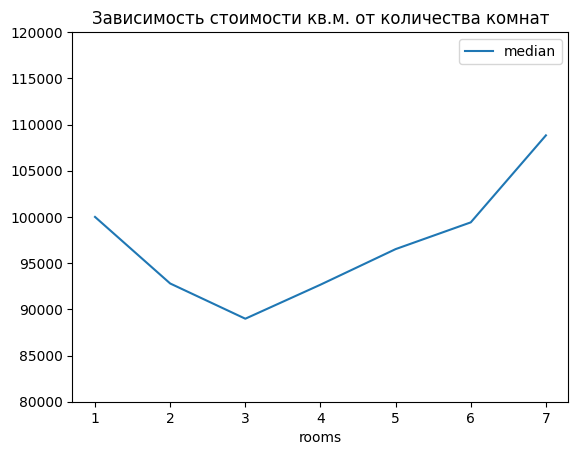

In [22]:
print('Корреляция по пирсону между количеством комнат и ценой квадратного метра:',data['rooms'].corr(data['meter_price']))
pivot_rooms = data.pivot_table(index = 'rooms', values = 'meter_price', aggfunc = ['median', 'mean', 'count'] )
pivot_rooms.columns = ['median', 'mean', 'count']
pivot_rooms.query('count > 30').plot(y = 'median', ylim = (80000, 120000), title = 'Зависимость стоимости кв.м. от количества комнат')
pivot_rooms


Рассмотрим только категории квартир, в которых количество более 50. Видим, что наименьшей стоимость за квадратный метр обладают трехкомнатные квартиры. 

Разница в стоимости кв. метра на первом этаже и на другом: 17.0 %


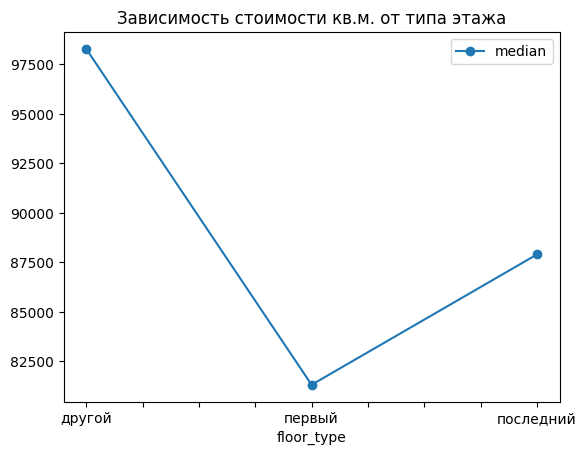

In [23]:
pivot_floor = data.pivot_table(index = 'floor_type', values = 'meter_price', aggfunc = ['median', 'mean', 'count'] )
pivot_floor.columns = ['median', 'mean', 'count']
pivot_floor.query('count > 30').plot(y = 'median', style = 'o-', title = 'Зависимость стоимости кв.м. от типа этажа')
pivot_floor
print('Разница в стоимости кв. метра на первом этаже и на другом:',round(1 - pivot_floor['median']['первый']/pivot_floor['median']['другой'], 2)*100, '%' )

Квартиры на 1 этаже стоят значительно дешевле, чем все остальные. 

,median,mean,count
day,,,
0,94688.91,99438.432035,3612
1,95634.10,99734.539194,4183
2,95473.81,99617.181751,3974
3,95143.88,100162.906151,4295
4,94616.16,99012.143458,4000
5,93545.72,99018.170372,1936
6,94501.72,97708.373914,1699


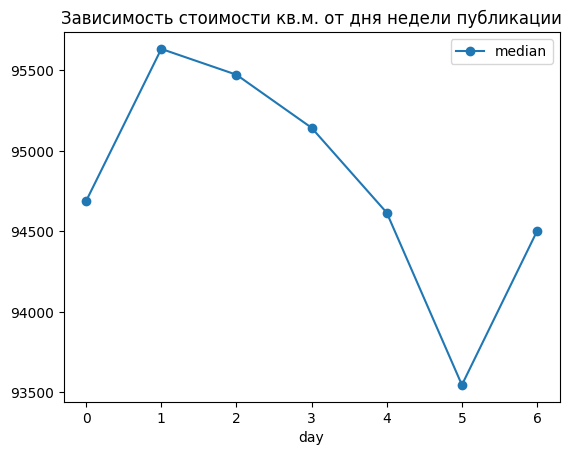

In [24]:
pivot_day = data.pivot_table(index = 'day', values = 'meter_price', aggfunc = ['median', 'mean', 'count'] )
pivot_day.columns = ['median', 'mean', 'count']
pivot_day.plot(y = 'median', style = 'o-', title = 'Зависимость стоимости кв.м. от дня недели публикации')
pivot_day

Видим, что цена квадратного метра в квартриах, выложенных во вторник наибольшая. С ходом недели цена снижается и достигает минимума в субботу. 

,median,mean,count
month,,,
1,95222.435,99862.581180,1500
2,95000.000,98768.735538,2640
3,95238.100,98973.215937,2587
4,96451.610,101949.026200,2379
5,92857.140,98543.764537,1274
6,92799.540,97763.317114,1760
7,95000.000,99625.641622,1695
8,96026.315,100110.528435,1744
9,95607.240,100464.271307,1981


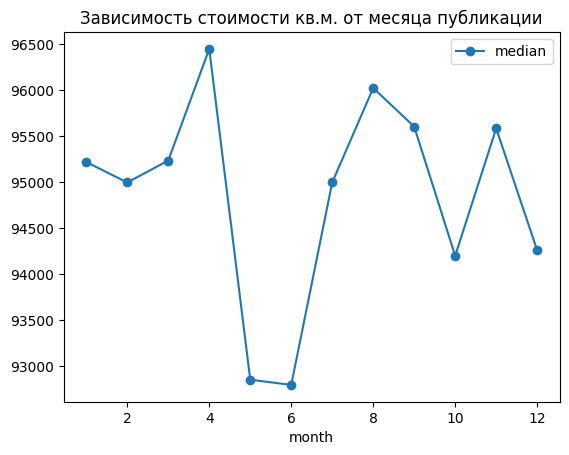

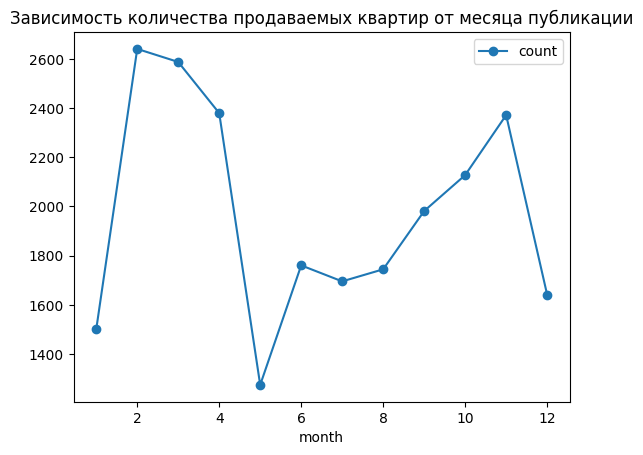

In [25]:
pivot_month = data.pivot_table(index = 'month', values = 'meter_price', aggfunc = ['median', 'mean', 'count'] )
pivot_month.columns = ['median', 'mean', 'count']
pivot_month.plot(y = 'median', style = 'o-', title = 'Зависимость стоимости кв.м. от месяца публикации')
pivot_month.plot(y = 'count', style = 'o-', title = 'Зависимость количества продаваемых квартир от месяца публикации')
pivot_month

Наблюдаем четкую сезонность продажи квартир. В мае и июне наблюдается минимум цен за квадратный метр, а максимумы приходятся на апрель и на август. Сначала я подумал, что это связано с увеличением объема рынка, но наибольшее количество квартир приходтся на начало года. В летний период видим снижение объема рынка и снижение цены. Получается, что в это время покупательская активность низкая. Чтобы продать квартиру приходится сильно понижать стоимость. 

,median,mean,count
year,,,
2014,107000.00,124830.426569,137
2015,93414.63,104614.200118,1191
2016,91743.12,98322.343252,2783
2017,92565.09,97621.876567,8190
2018,95689.66,97773.558016,8519
2019,103305.79,107123.780215,2879


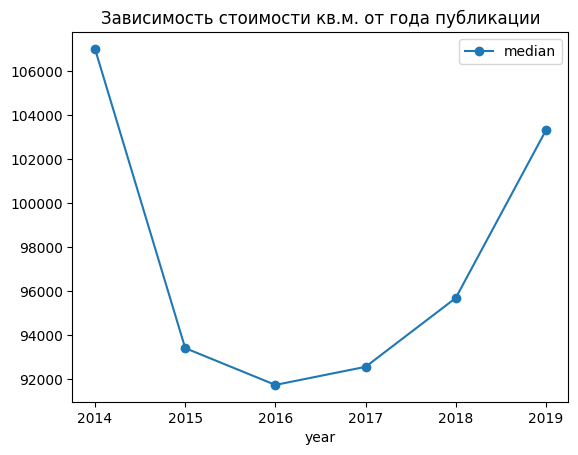

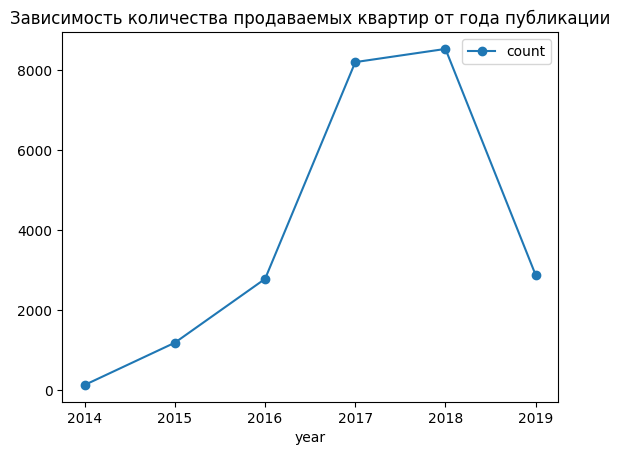

In [26]:
pivot_year = data.pivot_table(index = 'year', values = 'meter_price', aggfunc = ['median', 'mean', 'count'] )
pivot_year.columns = ['median', 'mean', 'count']
pivot_year.plot(y = 'median', style = 'o-', title = 'Зависимость стоимости кв.м. от года публикации')
pivot_year.plot(y = 'count', style = 'o-', title = 'Зависимость количества продаваемых квартир от года публикации')
pivot_year

Стоимость квадратного метра падала до 2016 года и в 2019 вернулась к показателям 2014 года. Высокая стоимость квадратного метра в 2014 и низкий объем продаж наверняка связаны с кризисов в те года. Также наблюдаем падение продаж в 2019 при высокой стоимости квадратного метра.

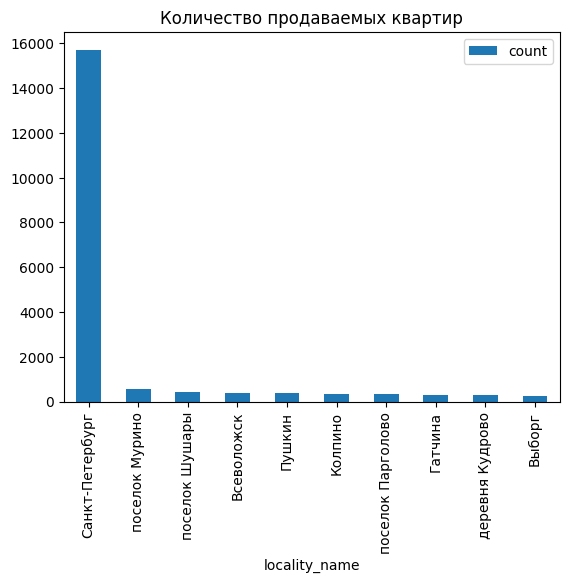

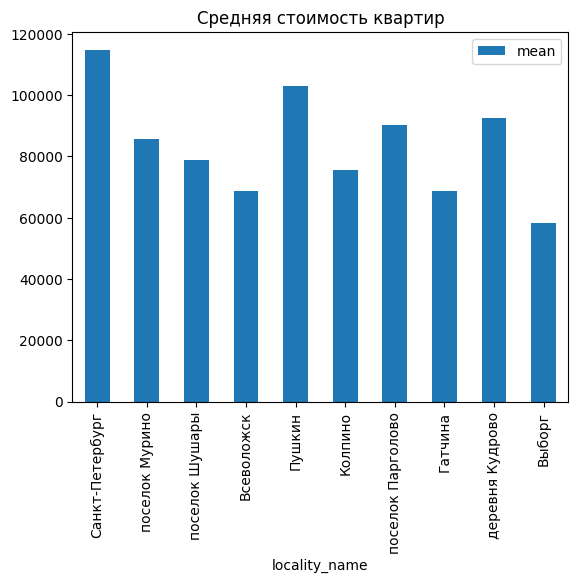

In [27]:
pivot_city = data.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = ['count', 'mean'] )
pivot_city.columns = ['count', 'mean']
pivot_city = pivot_city.sort_values(by = 'count', ascending = False)
pivot_city.head(10).plot(y = 'count', kind = 'bar', title = 'Количество продаваемых квартир')
pivot_city.head(10).plot(y = 'mean', kind = 'bar', title = 'Средняя стоимость квартир')
plt.show()

Выделили топ 10 городов по количеству продаваемых квартир и расчитали для них среднюю стоимость квадратного метра. Наибольшая стоимость наблюдается в Санкт-Петербурге и Пушкине, что соотвествует реальности. Санкт-Петербург и Пушкин довольно частый выбор для покупки жилья в Ленобласти. Наименьшая стоимость квадратного метра из топ 10 в Выборге - почти в два раза меньше, чем в Петербурге.

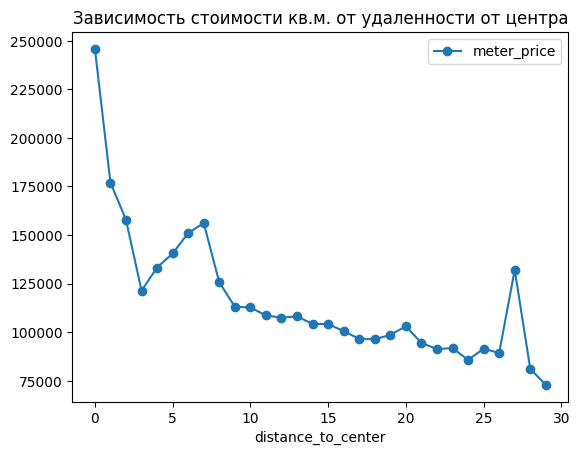

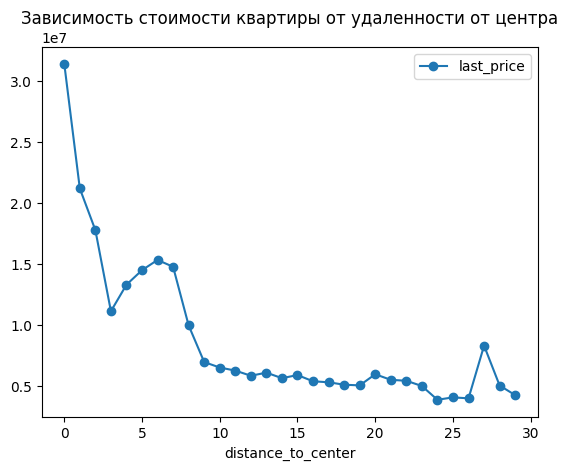

In [28]:
pivot_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'distance_to_center', values = ['meter_price','last_price'])
pivot_spb.plot(y = 'meter_price', style = 'o-', title = 'Зависимость стоимости кв.м. от удаленности от центра')
pivot_spb.plot(y = 'last_price', style = 'o-', title = 'Зависимость стоимости квартиры от удаленности от центра')
plt.show()

Видим уменьшение стоимости квартиры по удалению от центра с двумя пиками на 7 км и 27 км. Графики стоимости квадртатного метра и полной стоимости повторяют друг друга, что еще раз подтверждает небольшое влияние размера квартиры на ее стоимость. 

### Напишите общий вывод

В ходе второго проекта были проанализированы данные о продаже квартир по Ленинградской области. 

Значительной частью проекта стала предобработка данных. Пропуски по данным, полученным от пользователей удалось заполнить полностью. В данных, полученных с картографических источников пропуски устранить не удалось из-за сложности реализации.

Наибольшее количество пропусков было в стобце is_apatrment, balcony и ceiling_height. Необходимо изменить способ сбора информации для получения более качественного анализа. Можно добавить справочную информацию об апартаментах и расчете площади кухни и жилой площади. 

В столбце days_exposition были обнаружены аномальные значения 0,7,30,45,90 дней с момента публикации. Удалось отфильтровать все аномальные значения, кроме 45 и 90. Возможен технический сбой при заполнении. 

Результаты анализа характеристик квартир:
- на рынке в основном представлены 1 и 2 комнатные квартиры с жилой площадью 19 и 30 квадратных метров
- большую всего квартир продается в 5 и 9 этажных домах
- наибольшее количество квартир расположено в 12-16 км от центра города
- среднее растояние от квартиры до парка составляет 500 метров

Результаты анализа факторов, влияющих на стоимость квартир:
- первый или последний этаж понижает стоимость квартиры  83% от рыночной.
- стоимость квадратного метра в трехкомнатной квартире дешевле чем в однокомнатных на 10%
- в субботу публикуются квартиры с наименьшей стоимостью квадратного метра
- стоимость квадратного метра и объем рынка имеет сезонность: в летний период видим снижение объема рынка и снижение цены, а в весенний и осенний и объем, и цены повышаются.
- получены данные о стоимости квартир и объеме рынка в диапазоне 2014 - 2019: в 2016 стоимость квадратного метра достигла минимума. Для получения более достоверных данных необходимо провести классификацию квартир.
- в Санкт-Петербурге результирующим фактором является удаленность от центра. Чем дальше квартира от центра, тем ниже цена. В данном распределении наблюдаются зоны повышенных цен 7 и 27 км от центра. Данные зоны можно ассоциировать с двумя группами людей: важна инфраструктура и близость к центру, важна отдаленность от центра и тишина.


